<a href="https://colab.research.google.com/github/syibrahima31/Machine_Learning_From_Scratch/blob/master/Knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import modules 

In [88]:

import numpy as np 
import matplotlib.pyplot as plt 
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


## Import the dataset 


In [91]:
iris_dataset = load_iris()
data, target  = iris_dataset.data, iris_dataset.target
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state = 42)

## Cerate the model KNN 

In [84]:
class KNN:

  def __init__(self, k):
    """
    k : represent the number of neighbors 
    """
    self.k = k 



  def fit(self, x_train, y_train):
    self.X = x_train
    self.y = y_train


  def euclid_dist (self, a, b):
    return   np.sqrt(np.sum((a-b)**2))


  def _predict(self, obs):
    distance = [self.euclid_dist(obs,x) for x in self.X]
    distance = np.array(distance)  
    index = distance.argsort()
    k_neighbors = self.y[index][:self.k]
    counter = Counter(k_neighbors)
    pred = counter.most_common()[0][0]
    return pred


  def  predict(self, X):
    predictions = [self._predict(x) for x in X]
    return np.array(predictions)   



  def score(self, X_test, y_test):
    predictions = self.predict(X_test)
    acc = ((predictions==y_test).sum()) / y_test.shape[0]
    return acc

In [85]:
# 

In [100]:
 L_train = []
 L_test =  []
 for i in range(1, 100):
   model = KNN(i)
   model.fit(x_train, y_train)
   score_train = model.score(x_train, y_train)
   score_test =  model.score(x_test, y_test)
   L_train.append(score_train)
   L_test.append(score_test)

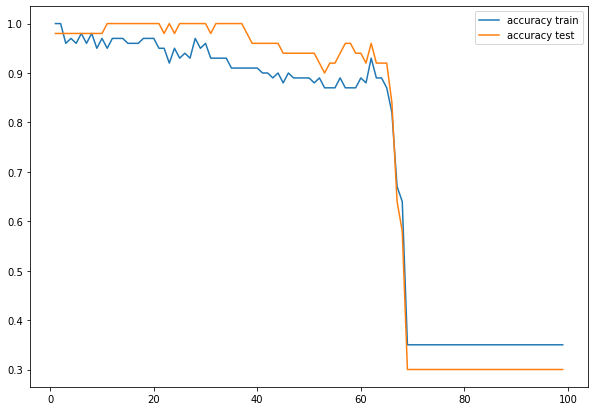

In [110]:
plt.figure(figsize=(10,7 ))
plt.plot(range(1, 100), L_train, label = "accuracy train")
plt.plot(range(1, 100), L_test, label = "accuracy test")
plt.legend()